In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. How many men and women (sex feature) are represented in this dataset?

In [4]:
data["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [5]:
data["sex"].value_counts(normalize=True)

sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='sex'>

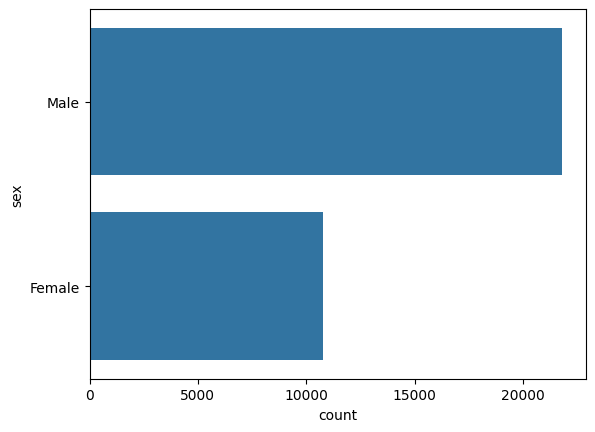

In [6]:
sns.countplot(data=data["sex"])

2. What is the average age (age feature) of women?

In [7]:
data[data["sex"]=="Female"]["age"].mean()

36.85823043357163

3. What is the percentage of German citizens (native-country feature)?

In [8]:
data["native-country"].value_counts(normalize=True)["Germany"]

0.004207487485028101

4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [9]:
data.groupby(["salary"])["age"].agg(["mean", "std"])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


6. Is it true that people who earn more than 50K have at least high school education? (education – `Bachelors`, `Prof-school`, `Assoc-acdm`, `Assoc-voc`, `Masters` or `Doctorate` feature)

In [10]:
data[data["salary"] == ">50K"]["education"].value_counts()

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64

7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [11]:
data.groupby("race")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [12]:
data.groupby("sex")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


In [13]:
data.groupby(["race", "sex"])["age"].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

8. Among whom is the proportion of those who earn a lot (`>50K`) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (`Married-civ-spouse`, `Married-spouse-absent` or `Married-AF-spouse`), the rest are considered bachelors.

In [14]:
data["marital-status"].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [15]:
married = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]

In [16]:
# Married men
data[(data["sex"] == "Male") & (data['marital-status'].str.startswith('Married'))]["salary"].value_counts(normalize=True)

salary
<=50K    0.559486
>50K     0.440514
Name: proportion, dtype: float64

In [17]:
# Single men
data[(data["sex"] == "Male") & ~(data['marital-status'].str.startswith('Married'))]["salary"].value_counts(normalize=True)

salary
<=50K    0.915505
>50K     0.084495
Name: proportion, dtype: float64

9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?

In [18]:
max_hours = data["hours-per-week"].max()
print(f"Max number of hours a person works per week is {max_hours}")

people_with_max_hours = data[data["hours-per-week"] == max_hours]
print(f"{len(people_with_max_hours)} people work with max ({max_hours}) hours")

percentage_more_than_50 = people_with_max_hours["salary"].value_counts(normalize=True).loc[">50K"]
print(f"{percentage_more_than_50 * 100:.2f}% who earn >50K among {len(people_with_max_hours)} people")

Max number of hours a person works per week is 99
85 people work with max (99) hours
29.41% who earn >50K among 85 people


10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?



In [19]:
data.groupby(["native-country", "salary"])["hours-per-week"].mean()

native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64

In [20]:
pd.crosstab(
    data["native-country"],
    data["salary"],
    values=data["hours-per-week"],
    aggfunc="mean",
).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


In [21]:
data[data["native-country"] == "Japan"].groupby(["salary"])["hours-per-week"].mean()

salary
<=50K    41.000000
>50K     47.958333
Name: hours-per-week, dtype: float64